# Signals: properties of signal objects
This notebook demonstrates the properties and attributes of signal objects, and more generally of sympy objects.

In [39]:
# setup
from __future__ import division, print_function
import sympy as sy
from sig2d.signals import amplitude, e_field, signal, Signal, signals_for_order
sy.init_printing()

# Signals

We can generate a single signal $\chi_{+k_1+k_2}$ directly:

In [20]:
s = Signal([-1,2])
s

It is a subtype of sympy's `Symbol`, and can be manipulated accordingly:

In [21]:
s.conjugate()

In [22]:
sy.expand_complex(sy.Abs(s)**2)

It has an extra attribute `k` to keep track of the wavevectors:

In [23]:
s.k

Their string representation is a valid latex expression:

In [28]:
print(repr(s))

\chi_{-k_1+k_2}


Note that the raw string contains a double backslash `\\`. This is due to python syntax.

In [30]:
repr(s)

'\\chi_{-k_1+k_2}'

The symbols themselves aren't of much use: we need a way to apply phase cycling and chopping. This is achieved using amplitudes $A_i$. There are tools to generate the amplitudes without risk of typos, as well as the more complete signals and electric fields.

In [31]:
amplitude(2)

In [33]:
e_field(2)

In [35]:
sig = signal([-1, 2])
sig

Note that this signal is now composite: it's a product of multiple symbols.

We can inspect the operation and elements:

In [37]:
# it's a product
sig.func

sympy.core.mul.Mul

In [38]:
# the arguments are in no particular order: complex numbers commute.
sig.args

The sum of multiple signals for a syntax tree: it's a sum of terms which are themselves products, and so on.

In [40]:
sig = signals_for_order(2,2) # 2 pulses, second order
sig

In [42]:
sig.func

sympy.core.add.Add

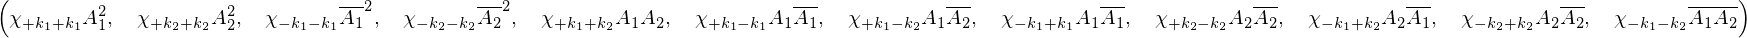

In [43]:
sig.args

In [44]:
sig.args[0].func

sympy.core.mul.Mul

In [45]:
sig.args[0].args

Even a simple problem will have a lot of terms:

In [54]:
detected = sig+e_field(2)
detected *= detected.conjugate()
detected = detected.expand()
len(detected.args)